# Clarification des informations 
 ## Theme d'analyse: L'impact du type d'application sur la performance du réseau 5G
 

 | Colonne            | Type de Donnée | Description                                      | Valeurs Attendues                     |
|--------------------|----------------|--------------------------------------------------|---------------------------------------|
| Date               | Date           | La date à laquelle l'observation a été effectuée. | Dates entre 2019 et 2023.             |
| User_ID            | String         | Identifiant unique de l'utilisateur.             | Une chaîne alphanumérique de 8 caractères. |
| Location           | String         | Ville et état de l'utilisateur.                  | Une combinaison ville/état des États-Unis. |
| Application_Type   | String         | Type d'application utilisée.                     | -                                     |
| Signal_Strength    | int/float      | Force du signal mesurée en dBm (décibels-milliwatts). | Entre -120 et -30.                    |
| Latency            | int            | Temps de latence du réseau en millisecondes.     | Entre 5 et 300.                       |
| User_Satisfaction  | int/NA         | Score de satisfaction de l'utilisateur (1-5).    | Entre 1 et 5.                         |
| Download_Speed     | float          | Débit descendant mesuré en Mbps (mégabits par seconde). | Entre 0 et 1000.                      |
| Upload_Speed       | float          | Débit montant mesuré en Mbps.                    | Entre 0 et 500.                       |
| Resource_Allocation| float          | Pourcentage des ressources réseau allouées.      | Entre 0 et 100.                       |

## Importons les parckages

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importons le dataset

In [66]:
data=pd.read_csv("5G_Network_QoS_USA__.csv")
data.shape

(5800, 10)

### Affichons les 5 premiers lignes du dataset

In [67]:
data.head()

,Date,User_ID,Location,Application_Type,Signal_Strength,Latency,User_Satisfaction,Download_Speed,Upload_Speed,Resource_Allocation
0,2021-03-21 03:08:49,A11SK2MG,"Chicago, IL",Visioconférence,-52.106285,57.481950,4.0,326.520455,606.601144,55.642843
1,2021-12-29 18:48:05,KFP39J87,"Chicago, IL",Streaming Vidéo,-51.636550,91.442376,4.0,741.265544,393.757643,57.330996
2,2021-01-08 16:27:10,6KDEX0CE,"San Diego, CA",Visioconférence,-81.434717,158.689807,3.0,492.120329,NaN,89.472639
3,2022-06-10 21:43:16,EI7W00GI,"Chicago, IL",Navigation Web,-30.489443,157.173565,4.0,859.732561,462.656973,65.911151
4,2021-01-08 02:48:24,C6LZRA6B,"San Antonio, TX",Navigation Web,-90.540144,139.720266,NaN,579.219562,72.818179,50.283174


## Renomons les colonnes en français pour plus de compréhensions 

In [68]:
data.rename(columns={"User_ID":"Id_utilisateur",
                     "Location":"Emplacement",
                     "Application_Type":"Type_d'application",
                     "Signal_Strength":"Force_du_signal",
                     "Latency":"Latence",
                     "User_Satisfaction":"Satisfaction_des_utilisateurs",
                     "Download_Speed":"Vitesse_de_téléchargement",
                     "Upload_Speed":"Débit_montant",
                     "Resource_Allocation":"Allocation_des_ressources"}, inplace=True)

In [69]:
data.head()

,Date,Id_utilisateur,Emplacement,Type_d'application,Force_du_signal,Latence,Satisfaction_des_utilisateurs,Vitesse_de_téléchargement,Débit_montant,Allocation_des_ressources
0,2021-03-21 03:08:49,A11SK2MG,"Chicago, IL",Visioconférence,-52.106285,57.481950,4.0,326.520455,606.601144,55.642843
1,2021-12-29 18:48:05,KFP39J87,"Chicago, IL",Streaming Vidéo,-51.636550,91.442376,4.0,741.265544,393.757643,57.330996
2,2021-01-08 16:27:10,6KDEX0CE,"San Diego, CA",Visioconférence,-81.434717,158.689807,3.0,492.120329,NaN,89.472639
3,2022-06-10 21:43:16,EI7W00GI,"Chicago, IL",Navigation Web,-30.489443,157.173565,4.0,859.732561,462.656973,65.911151
4,2021-01-08 02:48:24,C6LZRA6B,"San Antonio, TX",Navigation Web,-90.540144,139.720266,NaN,579.219562,72.818179,50.283174


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5684 non-null   object 
 1   Id_utilisateur                 5684 non-null   object 
 2   Emplacement                    5684 non-null   object 
 3   Type_d'application             5684 non-null   object 
 4   Force_du_signal                5684 non-null   float64
 5   Latence                        5684 non-null   float64
 6   Satisfaction_des_utilisateurs  5401 non-null   float64
 7   Vitesse_de_téléchargement      5684 non-null   float64
 8   Débit_montant                  5684 non-null   float64
 9   Allocation_des_ressources      5684 non-null   float64
dtypes: float64(6), object(4)
memory usage: 453.3+ KB


Distribution de la Satisfaction Client

C:\Users\Maurel DSA\AppData\Local\Temp\ipykernel_7752\1737526860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction_des_utilisateurs', data=data, palette='viridis')


<Axes: xlabel='Satisfaction_des_utilisateurs', ylabel='count'>

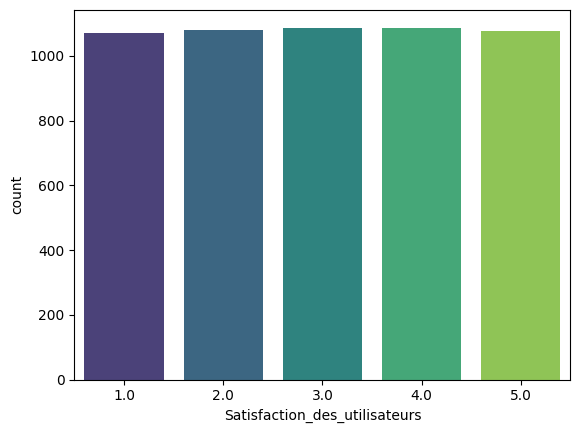

In [71]:
sns.countplot(x='Satisfaction_des_utilisateurs', data=data, palette='viridis')

Vérifier les valeurs manquantes

In [72]:

data.isnull().sum()

Date                             116
Id_utilisateur                   116
Emplacement                      116
Type_d'application               116
Force_du_signal                  116
Latence                          116
Satisfaction_des_utilisateurs    399
Vitesse_de_téléchargement        116
Débit_montant                    116
Allocation_des_ressources        116
dtype: int64

### ce qu'il faut retenir :

Le dataset contient **5800 entrées** et **10 colonnes**. Plusieurs colonnes ont des **valeurs manquantes**, notamment `Date` , `Type_d'application` , et `Force_du_signal` . La colonne `Date` est actuellement au format `object` et doit être convertie en `datetime` pour faciliter les analyses temporelles. Les colonnes numériques (`Force_du_signal`, `Latence`, etc.) sont prêtes pour des analyses statistiques, mais il faudra vérifier les valeurs incohérentes. Les colonnes `Id_utilisateur` et `Satisfaction_des_utilisateurs` sont complètes et peuvent être utilisées sans traitement supplémentaire. Une gestion des valeurs manquantes et une vérification des incohérences sont nécessaires avant de procéder à des analyses approfondies.

Notre analyse se concentre sur les types d'applications et les caractéristiques du réseau 5G. Par conséquent, l'absence de données complètes nous empêche de tirer des conclusions fiables. Afin d'obtenir des résultats pertinents, nous avons procédé à la suppression des lignes présentant des valeurs manquantes pour les variables suivantes : `Type d'application, Force du signal, Latence, Vitesse_de_téléchargement,Débit_montant`et `Satisfaction_des_utilisateurs` .

In [73]:
data = data.dropna(subset=["Type_d'application"])
data = data.dropna(subset=["Force_du_signal"])
data = data.dropna(subset=["Latence"])
data = data.dropna(subset=["Vitesse_de_téléchargement"])
data = data.dropna(subset=["Débit_montant"])
data = data.dropna(subset=["Allocation_des_ressources"])
data = data.dropna(subset=["Satisfaction_des_utilisateurs"])

Revérifions les valeurs manquantes

In [74]:
data.isnull().sum()

Date                             97
Id_utilisateur                   98
Emplacement                      92
Type_d'application                0
Force_du_signal                   0
Latence                           0
Satisfaction_des_utilisateurs     0
Vitesse_de_téléchargement         0
Débit_montant                     0
Allocation_des_ressources         0
dtype: int64

In [75]:
data.shape

(4780, 10)

Analyse descriptive

In [76]:
data.describe()

,Force_du_signal,Latence,Satisfaction_des_utilisateurs,Vitesse_de_téléchargement,Débit_montant,Allocation_des_ressources
count,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000
mean,-73.040657,150.511382,3.012552,528.295336,255.074188,59.672380
std,30.195653,67.727365,1.409415,220.304349,111.383357,20.959230
min,-119.954304,-300.002063,1.000000,0.000000,0.000000,10.014241
25%,-96.797262,106.113100,2.000000,371.363365,176.303709,46.172778
50%,-73.788568,151.123231,3.000000,528.680871,254.155919,60.832080
75%,-51.888693,197.029055,4.000000,682.813331,333.416338,74.433383
max,116.682535,339.973827,5.000000,1237.481030,606.601144,99.991345


Gestion des Doublons

In [77]:
doublons = data.duplicated()

print("Nombre de doublons :", doublons.sum())

Nombre de doublons : 0


aucun doublons trouvé

 **Gestion des valeurs `incohérentes`**

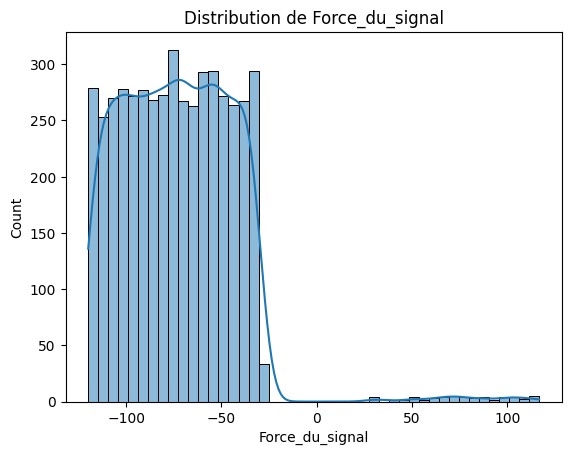

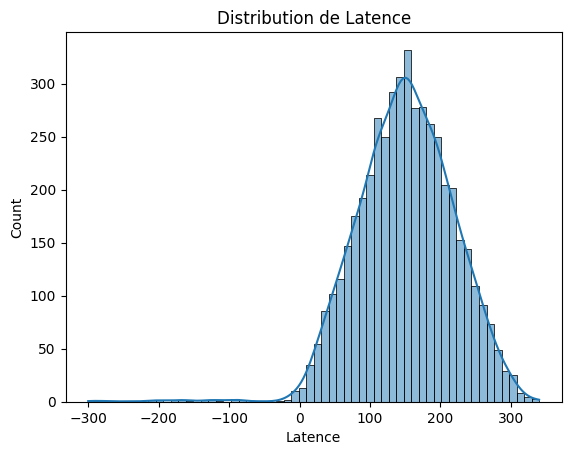

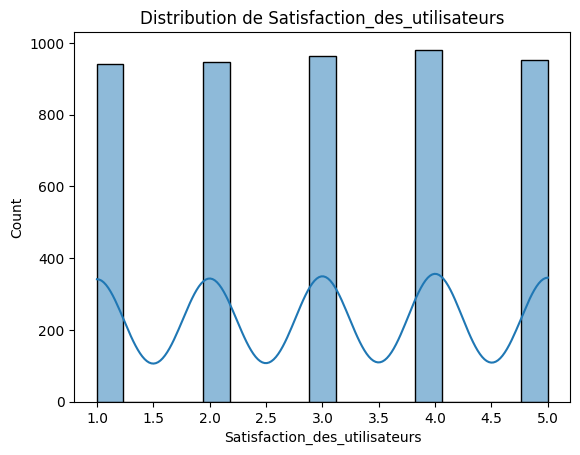

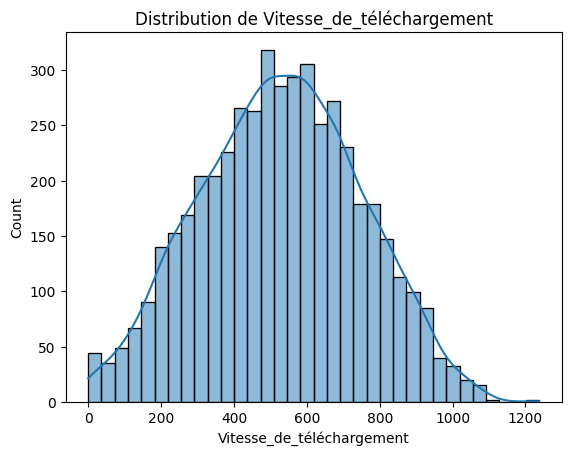

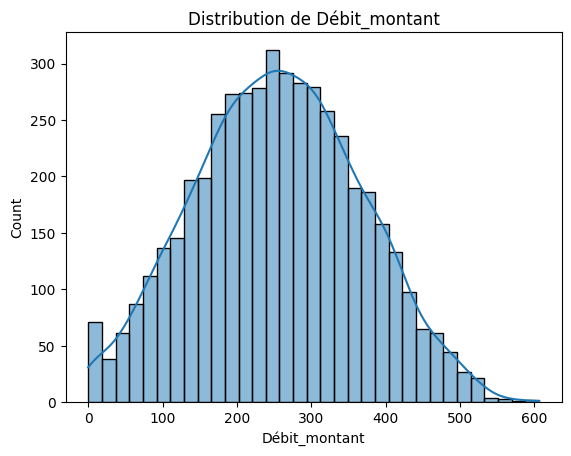

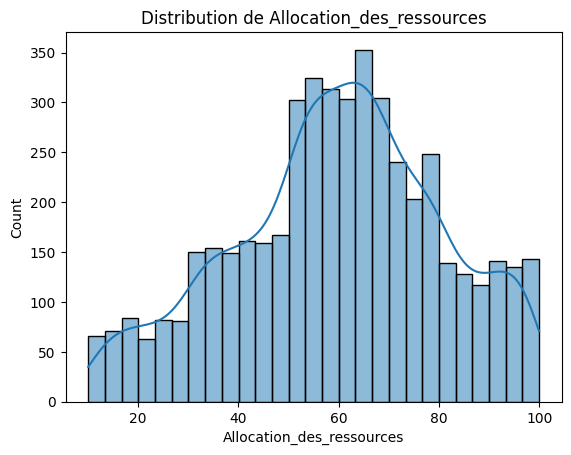

In [78]:
from pickle import TRUE

def hist_quant(df):
    for col in df.select_dtypes(include=np.number).columns: # changed df(numeric_only=True) to df.select_dtypes(include=np.number).columns to get the column names of the numeric columns
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution de {col}")
        plt.show()
hist_quant(data)

On remarque que nos données suivent une distribution normal et on remarque pour les colonnes **latence** et **Force du signale** des variable qui sont incohérentes

#### **Contôle des règles d'incohérences**

 ***Règle 1*** : verifions si toute les donnée de la colonne ***Force_du_signal*** sont comprise entre `-120 et -30`

In [79]:

incoherence1 = data[(data['Force_du_signal'] < -120) & (data['Force_du_signal'] > -30)]
len(incoherence1)

0

 ***Règle 2*** : verifions si toute les donnée de la colonne ***Latence*** sont comprise entre `5 et 300`

In [80]:

incoherence2 = data[(data['Latence'] < 5) & (data['Latence'] > 300)]
len(incoherence2)

0

 ***Règle 3*** : verifions si toute les donnée de la colonne ***Satisfaction_des_utilisateurs*** sont comprise entre `1 et 5`

In [81]:
incoherence3 = data[(data['Satisfaction_des_utilisateurs'] < 1) & (data['Satisfaction_des_utilisateurs'] > 5)]
len(incoherence3)

0

 ***Règle 4*** : verifions si toute les donnée de la colonne ***Vitesse_de_téléchargement*** sont comprise entre `0 et 1000`

In [82]:
incoherence4 = data[(data['Vitesse_de_téléchargement'] < 0) & (data['Vitesse_de_téléchargement'] > 1000)]
len(incoherence4)

0

 ***Règle 5*** : verifions si toute les donnée de la colonne ***Débit_montant*** sont comprise entre `0 et 500`

In [83]:
incoherence5 = data[(data['Débit_montant'] < 0) & (data['Débit_montant'] > 500)]
len(incoherence5)

0

 ***Règle 6*** : verifions si toute les donnée de la colonne ***Allocation_des_ressources*** sont comprise entre `0 et 100`

In [84]:
incoherence6 = data[(data['Allocation_des_ressources'] < 0) & (data['Allocation_des_ressources'] > 100)]
len(incoherence6)

0

### **Vérification de l'existence des valeurs aberrantes**

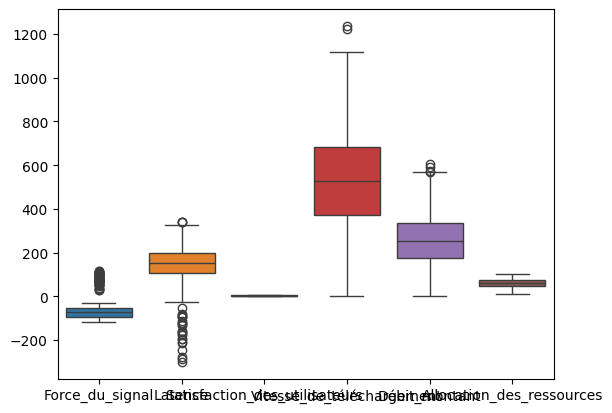

In [85]:
sns.boxplot(data=data)
plt.show()

Ici nous ne pouvons pas considérer les valeurs éloigné comme étant des valeurs abérantes du coup on les prends en compte dans notre analyse

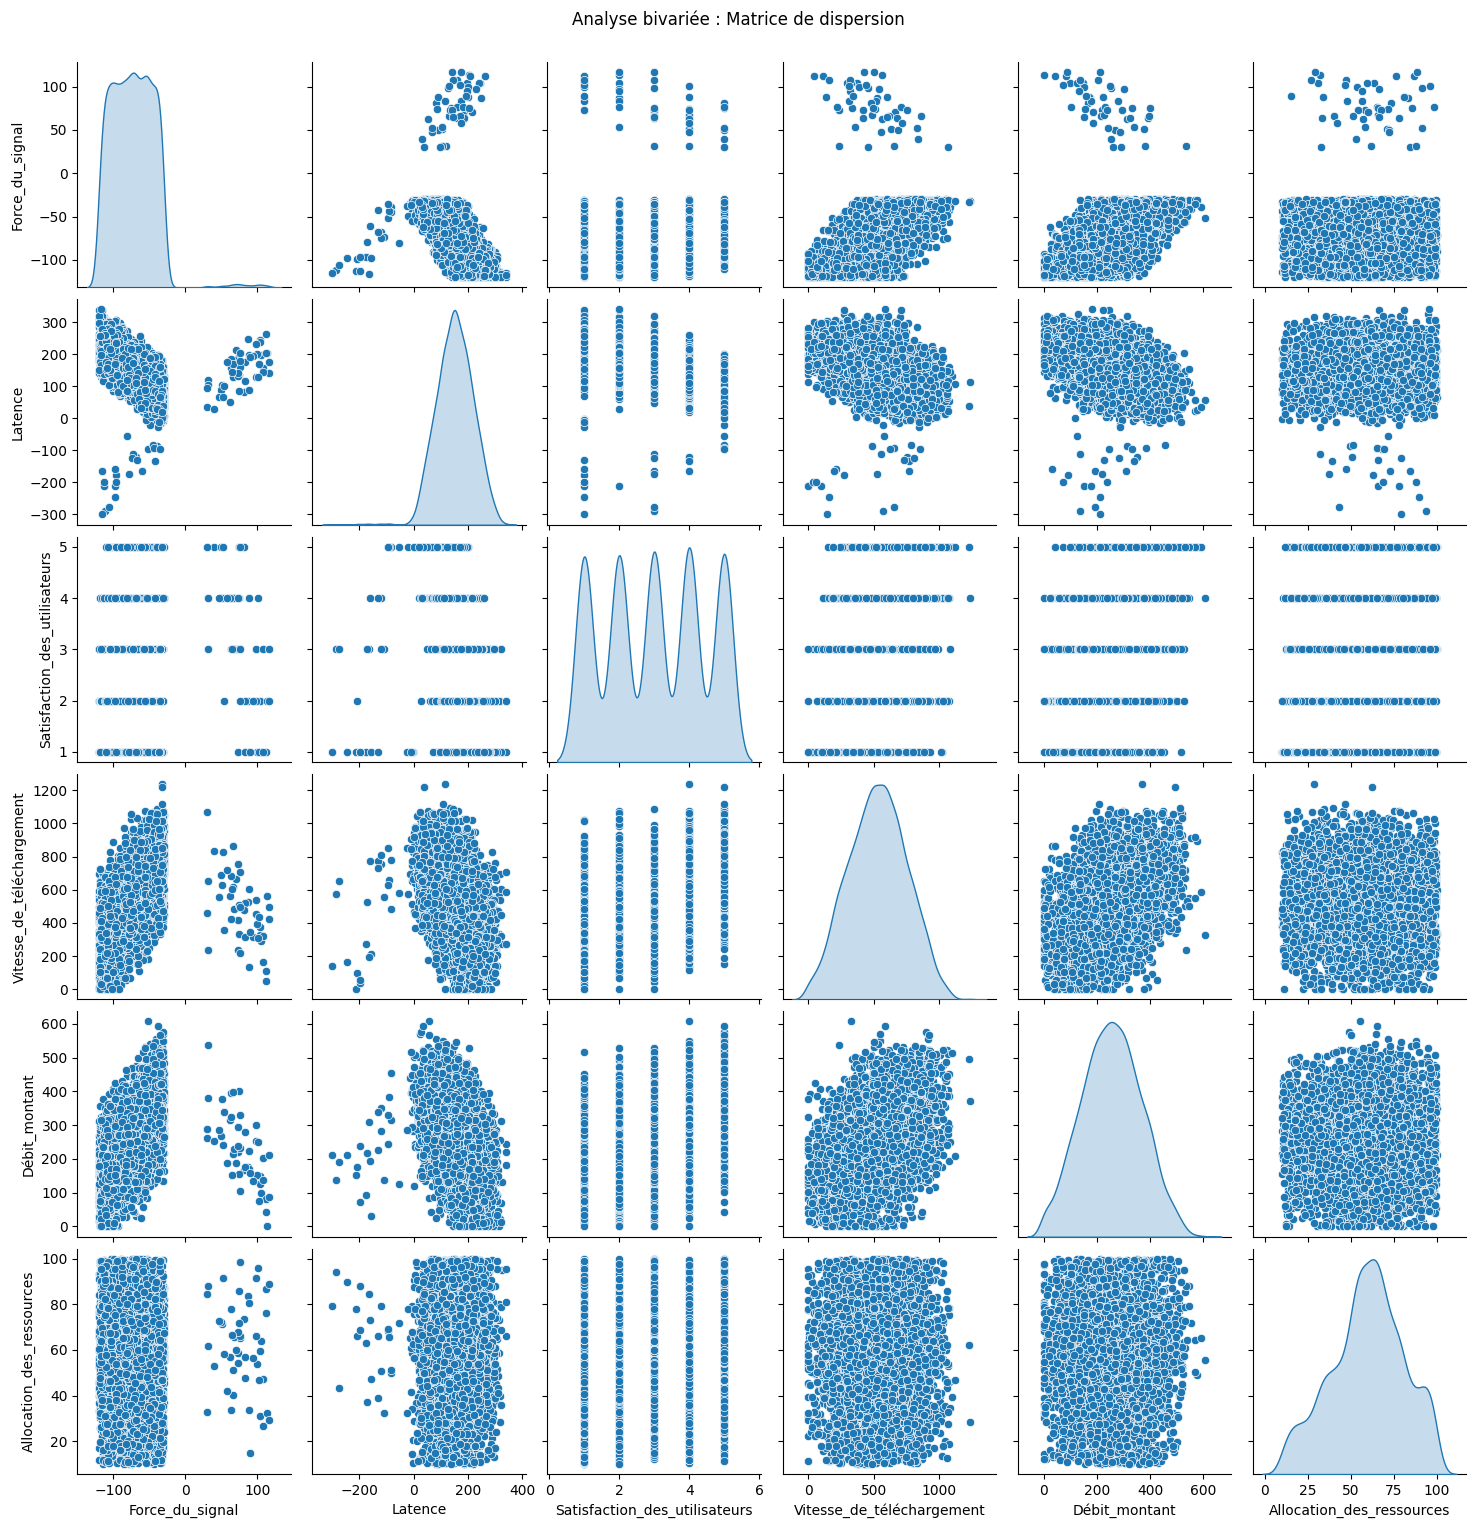

In [86]:
sns.pairplot(data[['Force_du_signal', 'Latence', 'Satisfaction_des_utilisateurs','Vitesse_de_téléchargement','Débit_montant','Allocation_des_ressources']], diag_kind='kde')
plt.suptitle("Analyse bivariée : Matrice de dispersion", y=1.02)
plt.show()

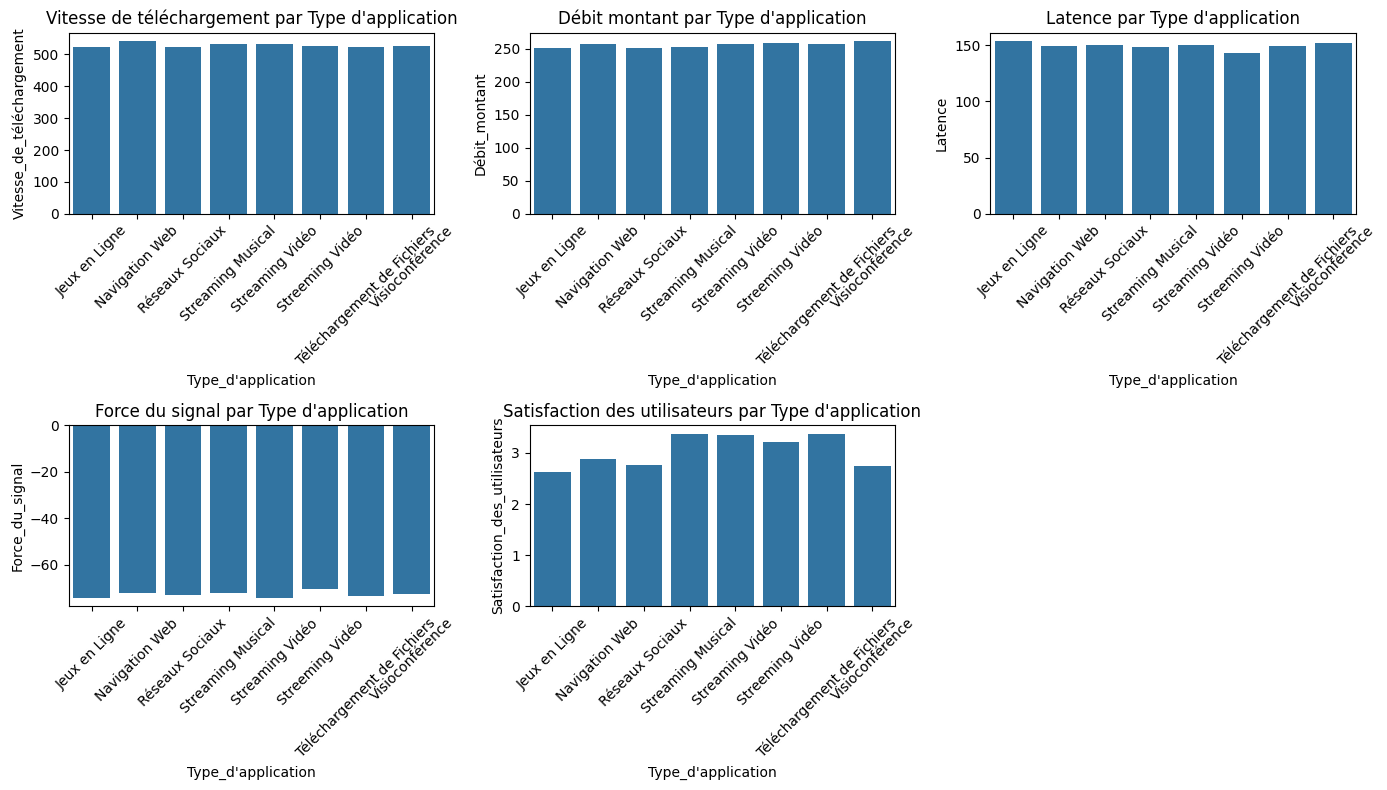

In [87]:
# Analyse de l'impact du type d'application sur la performance du réseau 5G
# Nous allons analyser les métriques suivantes : Download_Speed, Upload_Speed, Latency, Signal_Strength, User_Satisfaction

# Groupement des données par type d'application
app_performance = data.groupby("Type_d'application").agg({
    "Vitesse_de_téléchargement": 'mean',
    "Débit_montant": 'mean',
    "Latence": 'mean',
    "Force_du_signal": 'mean',
    "Satisfaction_des_utilisateurs": 'mean'
}).reset_index()

# Affichage des performances moyennes par type d'application
app_performance

# Visualisation des performances moyennes par type d'application
plt.figure(figsize=(14, 8))

# Téléchargement moyen par type d'application
plt.subplot(2, 3, 1)
sns.barplot(x="Type_d'application", y="Vitesse_de_téléchargement", data=app_performance)
plt.title("Vitesse de téléchargement par Type d'application")
plt.xticks(rotation=45)

# Débit montant par type d'application
plt.subplot(2, 3, 2)
sns.barplot(x="Type_d'application", y="Débit_montant", data=app_performance)
plt.title("Débit montant par Type d'application")
plt.xticks(rotation=45)

# Latence moyenne par type d'application
plt.subplot(2, 3, 3)
sns.barplot(x="Type_d'application", y="Latence", data=app_performance)
plt.title("Latence par Type d'application")
plt.xticks(rotation=45)

# Force du signal moyenne par type d'application
plt.subplot(2, 3, 4)
sns.barplot(x="Type_d'application", y="Force_du_signal", data=app_performance)
plt.title("Force du signal par Type d'application")
plt.xticks(rotation=45)

# Satisfaction utilisateur moyenne par type d'application
plt.subplot(2, 3, 5)
sns.barplot(x="Type_d'application", y="Satisfaction_des_utilisateurs", data=app_performance)
plt.title("Satisfaction des utilisateurs par Type d'application")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


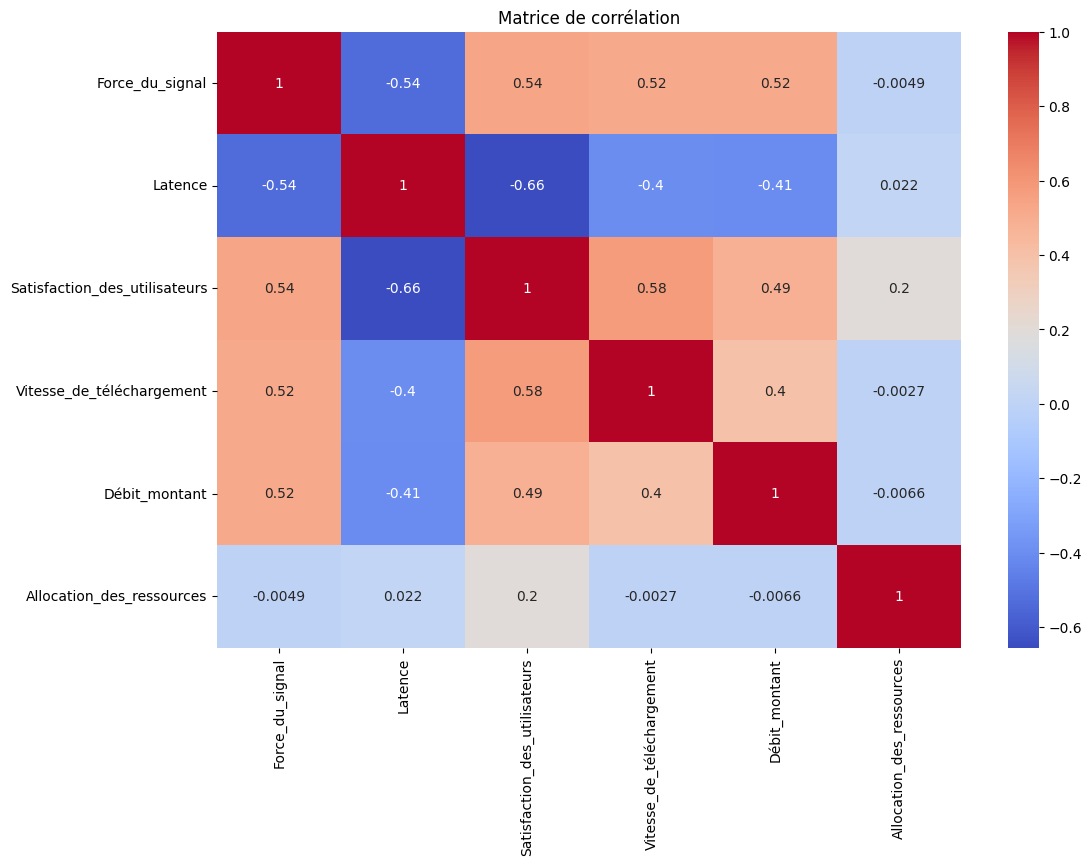

In [93]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

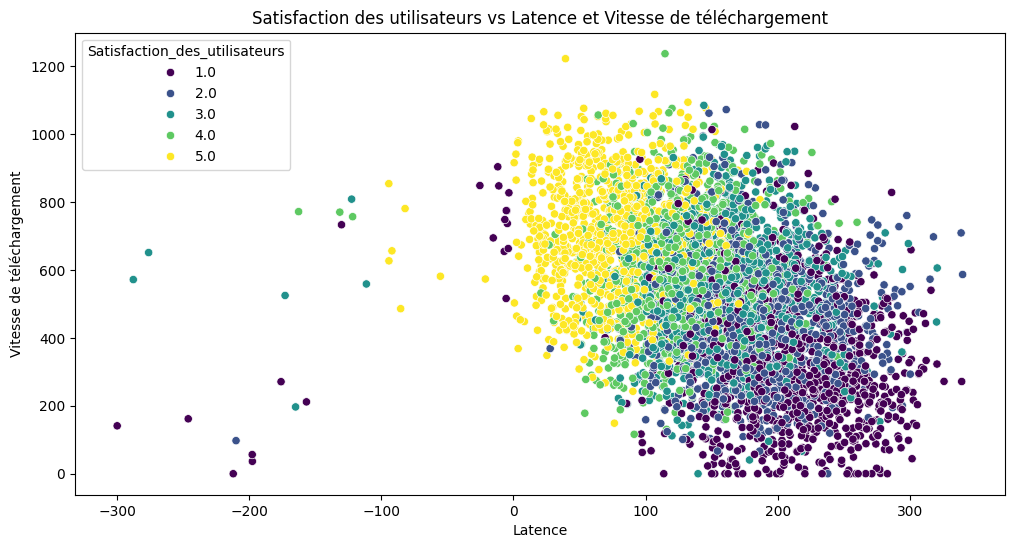

In [89]:
# Analyse de la satisfaction utilisateur en fonction de la latence et de la vitesse de téléchargement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Latence', y='Vitesse_de_téléchargement', hue='Satisfaction_des_utilisateurs', data=data, palette='viridis')
plt.title('Satisfaction des utilisateurs vs Latence et Vitesse de téléchargement')
plt.xlabel('Latence')
plt.ylabel('Vitesse de téléchargement')
plt.show()

Ici nous constatons que les utilisateurs sont plus satisfait du vitesse de téléchargement que de la latence

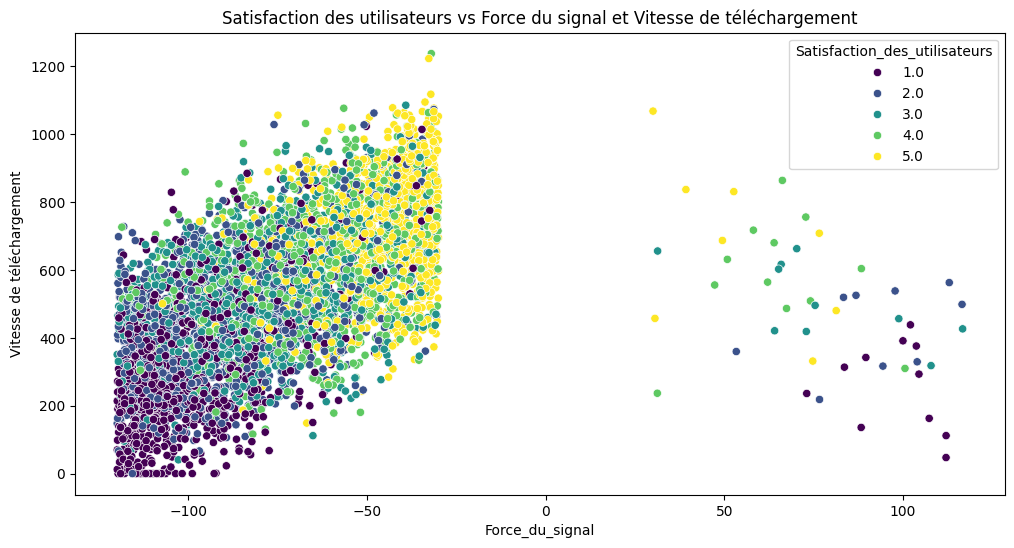

In [90]:
# Analyse de la satisfaction utilisateur en fonction de la force du signal et de la vitesse de téléchargement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Force_du_signal', y='Vitesse_de_téléchargement', hue='Satisfaction_des_utilisateurs', data=data, palette='viridis')
plt.title('Satisfaction des utilisateurs vs Force du signal et Vitesse de téléchargement')
plt.xlabel('Force_du_signal')
plt.ylabel('Vitesse de téléchargement')
plt.show()

In [91]:

colonne_interet = ["Type_d'application",'Force_du_signal', 'Latence', 'Satisfaction_des_utilisateurs','Vitesse_de_téléchargement','Débit_montant','Allocation_des_ressources']
data_filtered = data[colonne_interet].dropna()# Calculer les moyennes par type d'application
performance_par_app = data_filtered.groupby("Type_d'application").mean()
display(performance_par_app)

,Force_du_signal,Latence,Satisfaction_des_utilisateurs,Vitesse_de_téléchargement,Débit_montant,Allocation_des_ressources
Type_d'application,,,,,,
Jeux en Ligne,-73.996575,153.349249,2.635616,524.164675,250.580622,75.209425
Navigation Web,-72.197853,149.536525,2.885533,540.094165,257.151441,40.676412
Réseaux Sociaux,-72.858538,150.436802,2.771664,522.723875,250.862432,40.480331
Streaming Musical,-72.164535,148.760022,3.376900,531.405423,252.991467,55.629501
Streaming Vidéo,-74.006267,150.310385,3.358321,532.224752,256.642712,74.514102
Streeming Vidéo,-70.393105,143.058487,3.208333,525.401119,258.668597,65.679952
Téléchargement de Fichiers,-73.436531,149.251376,3.361409,521.732789,257.090581,55.259238
Visioconférence,-72.689923,152.102312,2.747006,527.399046,260.868568,74.512569


In [ ]:
# Générer un graphique de comparaison des performances
performance_par_app.plot(kind='bar', figsize=(11, 5))
plt.title('Performance moyenne du réseau 5G par type d\'application')
plt.xlabel('Type d\'application')
plt.ylabel('Valeurs moyennes')
plt.xticks(rotation=45)
plt.legend()
plt.show()